Link for the code: https://github.com/berkidem/tdi_interview/blob/main/pi_from_coin_flips.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt

How can we approximate the value of pi using coin tosses? We can use the following method:

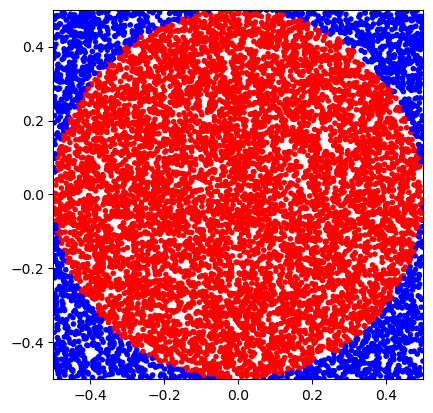

In [2]:
# generating a random number between 0 and 1 using coin tosses
def rand_num(k):
    coin_flips = np.random.randint(2, size=k)
    bin_str = "".join(str(x) for x in coin_flips)
    num = int(bin_str, 2)/((2**k) -1)
    return num

In [3]:
# generating a random sequence of n numbers between 0 and 1
def rand_seq(n, k):
    seq = [rand_num(k) for i in range(n)]
    return seq

In [4]:
# generating a random sequence of n points in the unit square
def points(n, k):
    x = rand_seq(n, k)
    y = rand_seq(n, k)
    points = np.column_stack((x, y))
    center = np.array([0.5, 0.5])
    points =  points - center
    return points

In [5]:
# estimating pi from n points in the unit square
def pi_from_coin_flips(n, k, plot = True):

    pts = points(n, k)
    dists = np.sqrt(np.sum(pts**2, axis=1))
    in_circle = np.sum(dists <= 0.5)
    ratio = in_circle/n
    approx_pi = 4*ratio

    # plot the points   
    if plot == True:
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        ax.set_xlim(-0.5, 0.5)
        ax.set_ylim(-0.5, 0.5)
        ax.scatter(pts[:,0], pts[:,1], c=dists <= 0.5, cmap='bwr', marker = '.')
        plt.show()

    return approx_pi

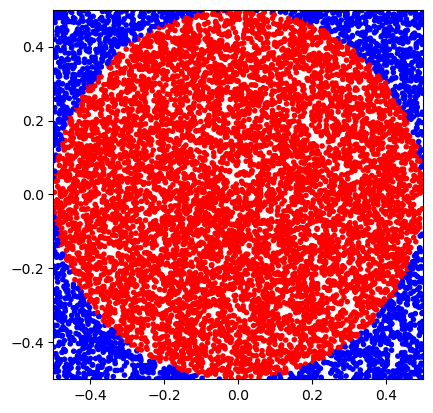

3.1332

In [6]:
pi_from_coin_flips(10000, 20)

In [7]:
# running the experiment m times and averaging the results
def average_pi(n, k, m, plot = False):
    return np.mean([pi_from_coin_flips(n, k, plot) for i in range(m)])

In [15]:
average_pi(100, 20, 1000)

3.1459200000000003

In [18]:
for i in range(1, 4):
    for j in range(1, 4):
        print(f"With {10**i} points and {10**j} runs, the approximation is {average_pi(10**i, 10, 10**j, plot = False)}")

With 10 points and 10 runs, the approximation is 2.7600000000000002
With 10 points and 100 runs, the approximation is 3.088
With 10 points and 1000 runs, the approximation is 3.1604000000000005
With 100 points and 10 runs, the approximation is 3.0119999999999996
With 100 points and 100 runs, the approximation is 3.1464
With 100 points and 1000 runs, the approximation is 3.1363600000000003
With 1000 points and 10 runs, the approximation is 3.1416000000000004
With 1000 points and 100 runs, the approximation is 3.1347199999999997
With 1000 points and 1000 runs, the approximation is 3.134488


#### Faster way to get a sequence of ("uniformly") random numbers

In [98]:
# generating a random sequence of n numbers between 0 and 1
def faster_rand_seq(n, k):
    coin_flips = np.random.randint(2, size=(n, k))
    powers = np.arange(k - 1, -1, -1)
    powers = 2**powers
    nums = coin_flips.dot(powers)
    seq = nums/((2**k) -1)
    return seq

### Pi from Uniform Random Numbers

In [9]:
# pi from uniform random variables
def pi_from_uniform(n):
    x = np.random.uniform(size=n)
    y = np.random.uniform(size=n)
    pts = np.column_stack((x, y))
    dists = np.sqrt(np.sum(pts**2, axis=1))
    in_circle = np.sum(dists <= 1)
    return 4*in_circle/n

In [25]:
# estimate pi from n points in the unit square, generated using uniform random variables
pi_from_uniform(10000000)

3.1414628